# MEAT CONSUMPTION

Due to the rise of environmental awareness - more people turn to vegeterianism, banning of animal cruelty - I was wondering if global meat consumption has changed through the decades and if so which countries affected the most. Our data covers the period from 1990 until 2028

* Data: https://www.kaggle.com/datasets/ulrikthygepedersen/meat-consumption

The data didn't need much cleaning. <br> - I dropped two columns: 'indicator' and 'frequency' - didn't add any information. <br> - The game changer here is the column 'measure'. It has two units: kg and tons. I convert all of my data to kg per capita so as to have the same indicator and avoid miscalculations.

Questions: 
1. In which year most meat was consumed
2. What type of meat has been consumed the most
3. Which country has most meat consumption in the year 2022
4. What type of meat this country prefered the most in 2022
5. There was increase or decrease of this type of meat in this country throughtout the years and what's the percentage of it

Hypothesis:
1. Meat has been used mainly in fast foods, which are the cheapest way of eating. So definetely there will be in the last decade
2. I think pig is the cheapest type of meat, definetely needs further investigation
3. USA 
4. Between beef and pig
5. Increase - easy way of processing

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
meat = pd.read_csv(r"C:\Users\gianis\\Downloads\meat_consumption.csv")
meat.head()

,location,indicator,subject,measure,frequency,time,value
0,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1990,0.000004
1,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1991,27.808401
2,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1992,26.278166
3,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1993,26.244478
4,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1994,25.541244


In [18]:
meat = meat.drop(columns=['indicator', 'frequency'])

In [20]:
meat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  12140 non-null  object 
 1   subject   12140 non-null  object 
 2   measure   12140 non-null  object 
 3   time      12140 non-null  int64  
 4   value     12140 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 474.3+ KB


In [21]:
meat.describe()

,time,value
count,12140.000000,1.214000e+04
mean,2009.042175,2.245855e+03
std,11.233660,1.040812e+04
min,1990.000000,7.505681e-08
25%,1999.000000,5.013586e+00
50%,2009.000000,2.427455e+01
75%,2019.000000,4.355984e+02
max,2028.000000,1.402526e+05


#### Convert thousand tons (THND_TONNE) to kg per capita (KG_CAP)
* kg = tons * 1000 

In [37]:
quantity = meat['value'] * 1000

meat['quantity'] = quantity.where(meat.measure == 'THND_TONNE', other=None)

meat['quantity'] = meat['quantity'].fillna(meat['value'])

meat.head()

,location,subject,measure,time,value,quantity
0,AUS,BEEF,KG_CAP,1990,0.000004,0.000004
1,AUS,BEEF,KG_CAP,1991,27.808401,27.808401
2,AUS,BEEF,KG_CAP,1992,26.278166,26.278166
3,AUS,BEEF,KG_CAP,1993,26.244478,26.244478
4,AUS,BEEF,KG_CAP,1994,25.541244,25.541244


In [41]:
#Drop column 'value', since I have trasfered the data to quantity
#Also drop column 'measure', since now there is a unique value. We know that we work with kg per capita


meat_cons = meat.drop(columns=['measure', 'value'])
meat_cons.head()

,location,subject,time,quantity
0,AUS,BEEF,1990,0.000004
1,AUS,BEEF,1991,27.808401
2,AUS,BEEF,1992,26.278166
3,AUS,BEEF,1993,26.244478
4,AUS,BEEF,1994,25.541244


In [47]:
meat_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  12140 non-null  object 
 1   subject   12140 non-null  object 
 2   time      12140 non-null  int64  
 3   quantity  12140 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 379.5+ KB


In [42]:
meat_cons.nunique()

location       39
subject         4
time           39
quantity    11909
dtype: int64

### 1)Which year is the king of meat consumption?

In [46]:
year = meat_cons.groupby('time')['quantity'].sum().sort_values(ascending=False).round(2).reset_index()
year.head()

,time,quantity
0,2028,9.457768e+08
1,2027,9.373358e+08
2,2026,9.289997e+08
3,2025,9.205872e+08
4,2024,9.123125e+08


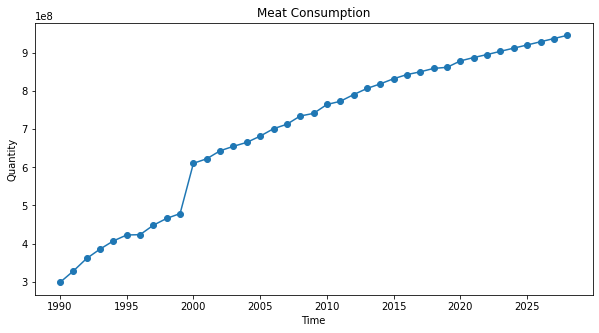

In [97]:
plt.figure(figsize=(10,5))

x=year['time']
y=year['quantity']

plt.plot(x, y, linestyle="-", marker="o")
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.title('Meat Consumption')

plt.show()

### 2)What type of meat has been eaten the most through these 3 decades

In [197]:
meat_type = meat_cons[[ 'subject', 'time', 'quantity']]
meat_type.head()

,subject,time,quantity
0,BEEF,1990,0.000004
1,BEEF,1991,27.808401
2,BEEF,1992,26.278166
3,BEEF,1993,26.244478
4,BEEF,1994,25.541244


In [200]:
#pivot table

meat_type_pivot = meat_type.pivot_table(index='time', columns='subject', values='quantity')

meat_type_pivot.head()

subject,BEEF,PIG,POULTRY,SHEEP
time,,,,
1990,1.259045e+06,1.600373e+06,9.143868e+05,204076.976669
1991,1.319125e+06,1.711755e+06,1.127570e+06,216178.241356
1992,1.463511e+06,1.773768e+06,1.225249e+06,227611.945166
1993,1.456196e+06,1.950334e+06,1.305106e+06,232249.170970
1994,1.519490e+06,2.060207e+06,1.399303e+06,239778.892541


Text(0.5, 1.0, 'Different types of meat consumption')

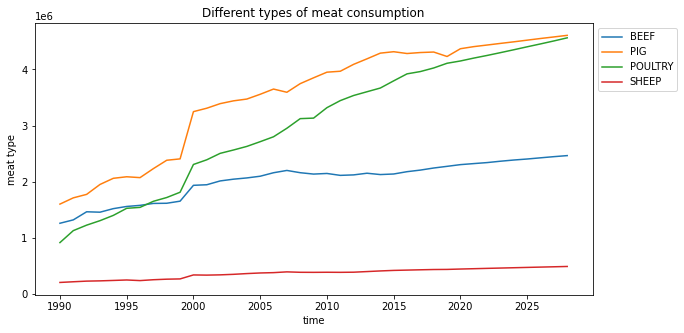

In [212]:
#use the results into a plot

ax = meat_type_pivot.plot(figsize=(10,5))
ax.set_ylabel('meat type')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Different types of meat consumption')

### 3)Which country consumed the most meat in the 2022

In [108]:
meat_22 = meat_cons.loc[meat_cons['time'] == 2022]

In [110]:
country = meat_22.groupby('location')['quantity'].sum().sort_values(ascending=False).reset_index()
country.head(10)

,location,quantity
0,WLD,3.416611e+08
1,BRICS,1.332227e+08
2,OECD,1.196356e+08
3,CHN,9.027864e+07
4,USA,4.217568e+07
5,EU27,3.920519e+07
6,BRA,2.113178e+07
7,RUS,1.147585e+07
8,MEX,8.818701e+06
9,VNM,7.040673e+06


### 4)What type of Meat is Mostly consumed in China in 2022

In [113]:
china = meat_22[meat_22['location'] == 'CHN']

In [114]:
china_meat = china.groupby('subject')['quantity'].sum().sort_values(ascending=False).round(2).reset_index()
china_meat

,subject,quantity
0,PIG,56695942.26
1,POULTRY,20251552.39
2,BEEF,7958401.53
3,SHEEP,5372747.21


In [170]:
china.subject.unique()

array(['BEEF', 'PIG', 'POULTRY', 'SHEEP'], dtype=object)

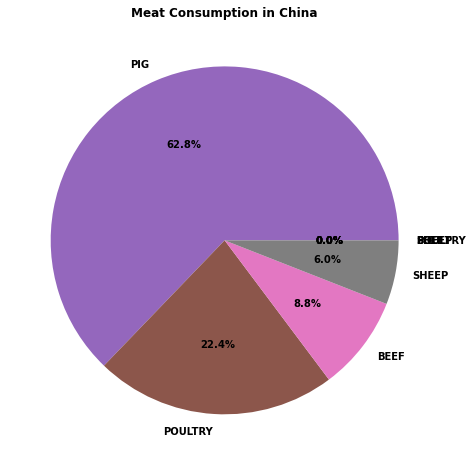

In [164]:
plt.figure(figsize=(8,8))
plt.pie(china['quantity'], labels=china['subject'], autopct='%1.1f%%', textprops={'fontweight':'bold'})
plt.title('Meat Consumption in China', fontweight='bold')
plt.show()

### 5)Is there any increase/decrease in the use of pig in China from 1990

In [117]:
china_pig = meat_cons.loc[(meat_cons['location'] == 'CHN') & (meat_cons['subject'] == 'PIG')]
china_pig

,location,subject,time,quantity
1755,CHN,PIG,1990,1.501528e+01
1756,CHN,PIG,1991,1.590071e+01
1757,CHN,PIG,1992,1.698949e+01
1758,CHN,PIG,1993,1.818380e+01
1759,CHN,PIG,1994,1.969056e+01
...,...,...,...,...
9132,CHN,PIG,2024,5.754494e+07
9133,CHN,PIG,2025,5.797437e+07
9134,CHN,PIG,2026,5.840419e+07
9135,CHN,PIG,2027,5.882166e+07


In [118]:
#what's the yearly percentage of pig consumption in CHN

china_pig.quantity.pct_change() * 100

1755         NaN
1756    5.896862
1757    6.847397
1758    7.029690
1759    8.286258
          ...   
9132    0.744124
9133    0.746260
9134    0.741391
9135    0.714796
9136    0.723059
Name: quantity, Length: 78, dtype: float64

In [119]:
#adding a new column in the china_pig dataframe, so as to use it in a graph

china_pig['Years Difference'] = china_pig['quantity'].pct_change() * 100
china_pig.head()

<ipython-input-119-57aca4e289b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_pig['Years Difference'] = china_pig['quantity'].pct_change() * 100


,location,subject,time,quantity,Years Difference
1755,CHN,PIG,1990,15.015280,NaN
1756,CHN,PIG,1991,15.900710,5.896862
1757,CHN,PIG,1992,16.989495,6.847397
1758,CHN,PIG,1993,18.183803,7.029690
1759,CHN,PIG,1994,19.690560,8.286258


In [120]:
china_pig.describe()

,time,quantity,Years Difference
count,78.000000,7.800000e+01,7.700000e+01
mean,2009.000000,2.325585e+07,9.143482e+05
std,11.327475,2.470192e+07,8.023352e+06
min,1990.000000,1.501528e+01,-7.883532e+00
25%,1999.250000,2.862529e+01,5.678952e-01
50%,2009.000000,1.128501e+07,1.559079e+00
75%,2018.750000,4.857734e+07,4.962730e+00
max,2028.000000,5.924697e+07,7.040463e+07


In [127]:
def categorize(x):
    if x > 3:
        return "Small"
    if x < 0:
        return "Big"
    else:
        return "Normal"
      
china_pig["Category"] = china_pig['Years Difference'].apply(categorize)

<ipython-input-127-509da169f3ef>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_pig["Category"] = china_pig['Years Difference'].apply(categorize)


In [122]:
china_pig.head()

,location,subject,time,quantity,Years Difference,Category
1755,CHN,PIG,1990,15.015280,NaN,Normal
1756,CHN,PIG,1991,15.900710,5.896862,Small
1757,CHN,PIG,1992,16.989495,6.847397,Small
1758,CHN,PIG,1993,18.183803,7.029690,Small
1759,CHN,PIG,1994,19.690560,8.286258,Small


<AxesSubplot:xlabel='Category', ylabel='time'>

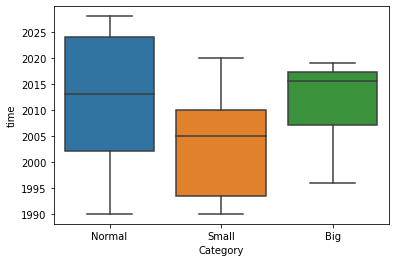

In [128]:
import seaborn as sns

sns.boxplot(y = china_pig['time'], x = china_pig['Category'])

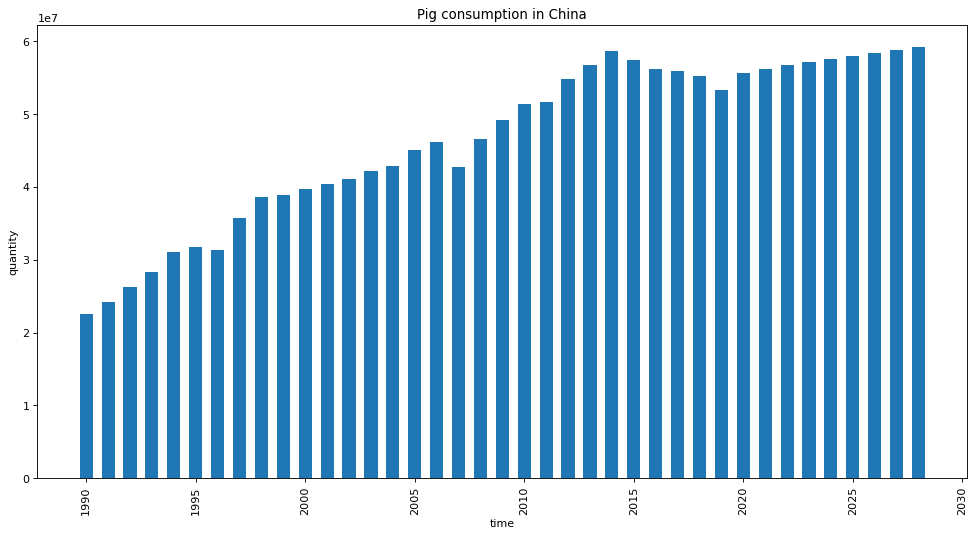

In [158]:
#visualize the results 

fig = plt.figure(figsize = (15, 7.5), dpi=80)

plt.xlabel('time')

plt.ylabel('quantity')

plt.title('Pig consumption in China')

plt.bar(china_pig['time'], china_pig['quantity'], width = 0.6)

plt.xticks(rotation='vertical')

plt.show()

***   asfafaf  

Final Results:
1. Throught the decades, the humanity is consimung more and more meat. It is obvious from the numbers and the prediction agrees with it as well. But, without taking into consideration the future years, 2020 is the year with the highest amounts of meat consumption
2. Pig
3. China
4. Pig
5. Surely an increase despite the rise of vegeterianism
